#### Handle Catagorial features
### One Hot Encoding with one catagorical feature  

In [4]:
import pandas as pd 
import os 
os.chdir("D:\data")
df=pd.read_csv("train.csv",usecols=["Sex"])

In [5]:
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


###### one hot endoing we use pd.get_dummies and also use drop_first if the one column represnt another column

In [7]:
pd.get_dummies(df,drop_first= True)

,Sex_male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [8]:
df=pd.read_csv("train.csv",usecols=["Embarked"])

In [9]:
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [13]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
df.dropna(inplace= True)

In [15]:
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [21]:
pd.get_dummies(df,drop_first= True)

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


## what if we have many many catagories can we perform one hot encoding ?

### one hot encoding with many catagorical features 

In [24]:
df1=pd.read_csv("Merci_train.csv",usecols=["X0","X1","X2","X3","X4","X5","X6"])

In [25]:
df1.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


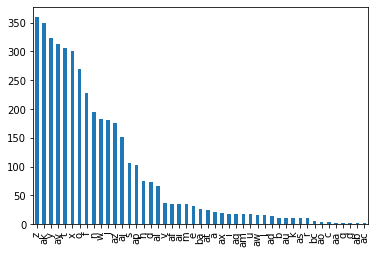

In [34]:
import matplotlib.pyplot as plt
df1["X0"].value_counts().plot.bar()

In [30]:
for i in df1.columns:
    print(df1[i].value_counts())

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
ai     34
m      34
e      32
ba     27
at     25
a      21
ax     19
i      18
aq     18
am     18
u      17
aw     16
l      16
ad     14
b      11
au     11
k      11
as     10
r      10
bc      6
ao      4
c       3
aa      2
q       2
g       1
ab      1
ac      1
Name: X0, dtype: int64
aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
f      23
y      23
j      22
n      19
k      17
p       9
g       6
d       3
ab      3
q       3
Name: X1, dtype: int64
as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
z       19
ag   

In [39]:
len(df1["X0"].unique())

47

In [42]:
for i in df1.columns:
    print(len(df1[i].unique()))

47
27
44
7
4
29
12


In [44]:
df1["X1"].value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [45]:
df1["X1"].value_counts().sort_values(ascending=False).head(10).index

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')

In [47]:
list_10=df1["X1"].value_counts().sort_values(ascending=False).head(10).index
list_10=list(list_10)

In [48]:
list_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [50]:
import numpy as np
for catagories in list_10:
    df1[catagories]=np.where(df1["X1"]==catagories,1,0)

In [51]:
df1.head()

,X0,X1,X2,X3,X4,X5,X6,aa,s,b,l,v,r,i,a,c,o
0,k,v,at,a,d,u,j,0,0,0,0,1,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,0,1,0,0,0,0,0


In [54]:
list_10.append("X1")

In [55]:
df1[list_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r
